In [56]:
from sklearn import tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
data_raw = pd.read_csv('pitches.csv')
# Print out size, shape, and column names
print("size: " + str(data_raw.size))
print("shape: " + str(data_raw.shape))
print("columns: " + str(data_raw.columns))

size: 114686160
shape: (2867154, 40)
columns: Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')


In [33]:
df = data_raw
# dropping useless columns and rows with null values
df = df.drop(["nasty", "zone", "type_confidence", "pitch_type", "ab_id", "event_num"], axis = 1)
df = df.dropna()
# drop everything except swinging strikes and foul balls
df = df[df.code.isin(['S', 'F'])]
# only 2-strike counts
df = df[df.s_count == 2]
df = df[df.b_count == 3]
print(df.shape)

(55282, 34)


In [48]:
# balance out the cases
strikes = df[df.code == 'S']
fouls = df[df.code == 'F']
fouls = fouls[0:len(strikes)]
tojoin = [fouls, strikes]
df = pd.concat(tojoin)
print(strikes.shape)
df.shape

(15199, 24)


(30398, 24)

In [49]:
df = df.drop(["y0", "type", "b_score", "outs", "pitch_num", "b_count", "s_count", "on_1b", "on_2b", "on_3b"], axis = 1)

KeyError: "['y0' 'type' 'b_score' 'outs' 'pitch_num' 'b_count' 's_count' 'on_1b'\n 'on_2b' 'on_3b'] not found in axis"

In [50]:
import sklearn.model_selection as tts
features_train, features_test, labels_train, labels_test = tts.train_test_split(df.transpose()[:23].transpose(), df.code, test_size = 0.3, random_state = 69)

In [51]:

print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(21278, 23)
(9120, 23)
(21278,)
(9120,)


In [52]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0) # max_depth = 15
tree = clf.fit(features_train, labels_train)

In [53]:
tree.get_depth()

44

In [54]:
tree.score(features_train, labels_train)

1.0

In [55]:
tree.score(features_test, labels_test)

0.6221491228070175

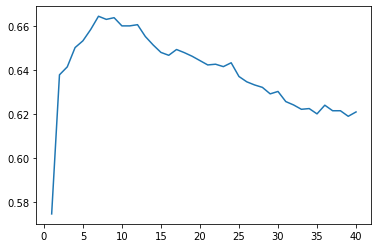

In [59]:
vals = []
index = []
for i in range(1,41):
    clf = DecisionTreeClassifier(random_state=0, max_depth = i)
    tree = clf.fit(features_train, labels_train)
    vals.append(tree.score(features_test, labels_test))
    index.append(i)
    
plt.plot(index, vals)